<a href="https://colab.research.google.com/github/singh-damanpreet04/Machine_Learning/blob/main/Day26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X, labels_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)   # Generate sample data

In [10]:
# DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=5).fit(X)

In [11]:
# Labels assigned by DBSCAN
labels = db.labels_

In [12]:
# Identify core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [13]:
# Number of clusters in labels, ignoring noise (-1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

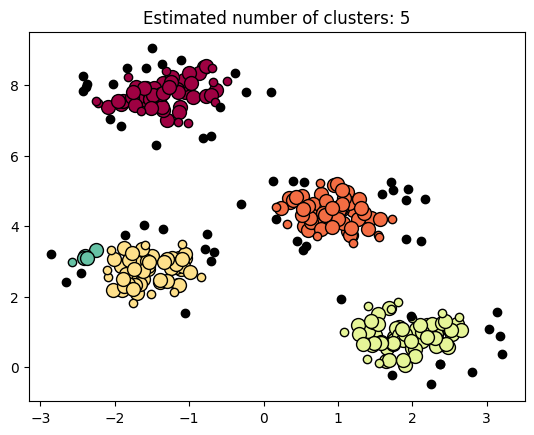

In [14]:
# Plotting result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters}')
plt.show()